In [8]:


# df_pandas_encoded = pd.get_dummies(df, columns=['Gender', 'Remarks'], drop_first=True)

# print(f"One-Hot Encoded Data using Pandas:\n{df_pandas_encoded}\n")

# encoder = OneHotEncoder(sparse_output=False)

# one_hot_encoded = encoder.fit_transform(df[categorical_columns])

# one_hot_df = pd.DataFrame(one_hot_encoded, 

# columns=encoder.get_feature_names_out(categorical_columns))

# df_sklearn_encoded = pd.concat([df.drop(categorical_columns, axis=1), one_hot_df], axis=1)

# print(f"One-Hot Encoded Data using Scikit-Learn:\n{df_sklearn_encoded}\n")

# One - Hot Encoding

#### One Hot Encoding is a method for converting categorical variables into a binary format. It creates new columns for each category where 1 means the category is present and 0 means it is not. The primary purpose of One Hot Encoding is to ensure that categorical data can be effectively used in machine learning models.

### Importance of One Hot Encoding
- Eliminating Ordinality: Many categorical variables have no inherent order (e.g., “Male” and “Female”). If we were to assign numerical values            (e.g., Male = 0, Female = 1) the model might mistakenly interpret this as a ranking and lead to biased predictions. One Hot Encoding eliminates         this risk by treating each category independently.
- Improving Model Performance: By providing a more detailed representation of categorical variables. One Hot Encoding can help to improve the             performance of machine learning models. It allows models to capture complex relationships within the data that might be missed if categorical           variables were treated as single entities.
- Compatibility with Algorithms: Many machine learning algorithms particularly based on linear regression and gradient descent which require
  numerical input. It ensures that categorical variables are converted into a suitable format.

## 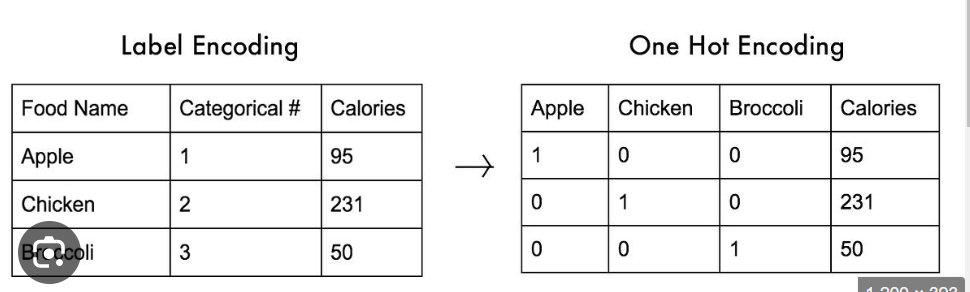

In [14]:
import pandas as pd

In [16]:
# import pandas as pd
# from sklearn.preprocessing import OneHotEncoder

data = {
    'Employee id': [10, 20, 15, 25, 30],
    'Gender': ['M', 'F', 'F', 'M', 'F'],
    'Remarks': ['Good', 'Nice', 'Good', 'Great', 'Nice']
}

df = pd.DataFrame(data)
print(f"Original Employee Data:\n{df}\n")

Original Employee Data:
   Employee id Gender Remarks
0           10      M    Good
1           20      F    Nice
2           15      F    Good
3           25      M   Great
4           30      F    Nice



## Use pd.get_dummies() to one-hot encode the categorical columns

In [19]:
df_pandas_encoded = pd.get_dummies(df, columns = ['Gender','Remarks'] , drop_first = True) 
print(f"The one_hot_encoded data is: \n {df_pandas_encoded}")

The one_hot_encoded data is: 
    Employee id  Gender_M  Remarks_Great  Remarks_Nice
0           10      True          False         False
1           20     False          False          True
2           15     False          False         False
3           25      True           True         False
4           30     False          False          True


In [20]:
encoded_data = pd.get_dummies(df)
encoded_data

,Employee id,Gender_F,Gender_M,Remarks_Good,Remarks_Great,Remarks_Nice
0,10,False,True,True,False,False
1,20,True,False,False,False,True
2,15,True,False,True,False,False
3,25,False,True,False,True,False
4,30,True,False,False,False,True


In [23]:
# integer mapping
encoded_data = pd.get_dummies(df, dtype = int)
encoded_data

,Employee id,Gender_F,Gender_M,Remarks_Good,Remarks_Great,Remarks_Nice
0,10,0,1,1,0,0
1,20,1,0,0,0,1
2,15,1,0,1,0,0
3,25,0,1,0,1,0
4,30,1,0,0,0,1


# The drop_first=True parameter in pd.get_dummies() is used to avoid multicollinearity by dropping the first category of each categorical variable.

How it Works:
pd.get_dummies(df, columns=['Gender', 'Remarks']) converts categorical variables into one-hot encoded columns, where each unique category becomes a separate column with binary values (0 or 1).
drop_first=True removes the first category from each encoded variable, preventing the "dummy variable trap" in regression models (where all dummy variables together can perfectly predict another, causing multicollinearity).

In [25]:
encoded_data = pd.get_dummies(df, dtype = int, drop_first = True)
encoded_data

,Employee id,Gender_M,Remarks_Great,Remarks_Nice
0,10,1,0,0
1,20,0,0,1
2,15,0,0,0
3,25,1,1,0
4,30,0,0,1


# Data Wrangling :  Join | Combine | Reshape 

In [29]:
data0 = pd.read_excel("test_data.xlsx" , sheet_name = 0)  # it has 3 sheets
data1 = pd.read_excel("test_data.xlsx" , sheet_name = 1)
data2 = pd.read_excel("test_data.xlsx" , sheet_name = 2)

In [30]:
data0

,sales_man_id,sales_man_name,sales_man_city,product_id,manager
0,1,Asad,Karachi,123,Jawed
1,2,Sumair,Lahore,123,Jawed
2,3,Farjad,Karachi,145,Najam
3,4,Hassan,Lahore,567,Najam
4,5,Nasir,Hyderabad,234,Jawed
5,6,Kashif,Hyderabad,234,Faisal
6,7,Sana,Lahore,567,Faisal
7,8,Fatima,Karachi,345,Najam
8,9,Abdullah,Karachi,123,Faisal


In [31]:
data1

,sales_man_id,sales_man_name,sales_man_city,product_id,manager,Experience
0,1,Ahmed,Karachi,123,Jawed,2
1,22,Umer,Lahore,123,Jawed,3
2,33,Huzaifa,Karachi,145,Najam,4
3,4,Asad,Lahore,567,Najam,5
4,55,Hussain,Hyderabad,234,Jawed,6
5,66,Ali,Hyderabad,234,Faisal,7
6,77,Sadaf,Lahore,567,Faisal,8
7,88,Kiran,Karachi,345,Najam,9
8,99,Ali,Karachi,123,Faisal,1
9,101,Asad,Hyderabad,432,Jawed,4


In [32]:
data2

,sales_man_name,Region,Sales,Amount
0,Asad,A,100,100000
1,Hussain,B,300,450000
2,Ali,C,234,125000
3,Sana,D,231,652000
4,Fatima,E,324,145000
5,Kashif,F,123,825000
6,Hassan,G,129,125000
7,Almas,H,345,325600
8,Fahan,I,400,895200


In [33]:
pd.concat([data0,data1]) # join on axis = 0

# In Pandas, axis=0 refers to the rows, and axis=1 refers to the columns.

,sales_man_id,sales_man_name,sales_man_city,product_id,manager,Experience
0,1,Asad,Karachi,123,Jawed,NaN
1,2,Sumair,Lahore,123,Jawed,NaN
2,3,Farjad,Karachi,145,Najam,NaN
3,4,Hassan,Lahore,567,Najam,NaN
4,5,Nasir,Hyderabad,234,Jawed,NaN
5,6,Kashif,Hyderabad,234,Faisal,NaN
6,7,Sana,Lahore,567,Faisal,NaN
7,8,Fatima,Karachi,345,Najam,NaN
8,9,Abdullah,Karachi,123,Faisal,NaN
0,1,Ahmed,Karachi,123,Jawed,2.0


In [34]:
# but here's an issue that experience is not there in data0
## So the NAN values you get can be solved by cleaning data techniques.

In [35]:
# another issue is of index numbers
pd.concat([data0,data1]).reset_index()

,index,sales_man_id,sales_man_name,sales_man_city,product_id,manager,Experience
0,0,1,Asad,Karachi,123,Jawed,NaN
1,1,2,Sumair,Lahore,123,Jawed,NaN
2,2,3,Farjad,Karachi,145,Najam,NaN
3,3,4,Hassan,Lahore,567,Najam,NaN
4,4,5,Nasir,Hyderabad,234,Jawed,NaN
5,5,6,Kashif,Hyderabad,234,Faisal,NaN
6,6,7,Sana,Lahore,567,Faisal,NaN
7,7,8,Fatima,Karachi,345,Najam,NaN
8,8,9,Abdullah,Karachi,123,Faisal,NaN
9,0,1,Ahmed,Karachi,123,Jawed,2.0


In [36]:
# additionally we have purana index column as well in the data due concat, so we'll drop

pd.concat([data0,data1]).reset_index(drop = True)

,sales_man_id,sales_man_name,sales_man_city,product_id,manager,Experience
0,1,Asad,Karachi,123,Jawed,NaN
1,2,Sumair,Lahore,123,Jawed,NaN
2,3,Farjad,Karachi,145,Najam,NaN
3,4,Hassan,Lahore,567,Najam,NaN
4,5,Nasir,Hyderabad,234,Jawed,NaN
5,6,Kashif,Hyderabad,234,Faisal,NaN
6,7,Sana,Lahore,567,Faisal,NaN
7,8,Fatima,Karachi,345,Najam,NaN
8,9,Abdullah,Karachi,123,Faisal,NaN
9,1,Ahmed,Karachi,123,Jawed,2.0


In [37]:
## join on axis = 1

In [38]:
pd.concat([data0,data1] , axis = 1)

,sales_man_id,sales_man_name,sales_man_city,product_id,manager,sales_man_id,sales_man_name,sales_man_city,product_id,manager,Experience
0,1.0,Asad,Karachi,123.0,Jawed,1,Ahmed,Karachi,123,Jawed,2
1,2.0,Sumair,Lahore,123.0,Jawed,22,Umer,Lahore,123,Jawed,3
2,3.0,Farjad,Karachi,145.0,Najam,33,Huzaifa,Karachi,145,Najam,4
3,4.0,Hassan,Lahore,567.0,Najam,4,Asad,Lahore,567,Najam,5
4,5.0,Nasir,Hyderabad,234.0,Jawed,55,Hussain,Hyderabad,234,Jawed,6
5,6.0,Kashif,Hyderabad,234.0,Faisal,66,Ali,Hyderabad,234,Faisal,7
6,7.0,Sana,Lahore,567.0,Faisal,77,Sadaf,Lahore,567,Faisal,8
7,8.0,Fatima,Karachi,345.0,Najam,88,Kiran,Karachi,345,Najam,9
8,9.0,Abdullah,Karachi,123.0,Faisal,99,Ali,Karachi,123,Faisal,1
9,NaN,NaN,NaN,NaN,NaN,101,Asad,Hyderabad,432,Jawed,4


# In Python, both `concat` and `merge` are used in **pandas** to combine DataFrames, but they serve different purposes:

### 1. `concat()`
- **Purpose**: Used for combining DataFrames along a particular axis (rows or columns).
- **How it works**: It simply stacks DataFrames on top of each other (axis=0) or side by side (axis=1).
- **Key Features**:
  - No need for a common column.
  - Works like appending or stacking.
  - Can handle different indexes.
  - Can ignore the index using `ignore_index=True`.

**Example**:
```python
import pandas as pd

df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
df2 = pd.DataFrame({'A': [5, 6], 'B': [7, 8]})

result = pd.concat([df1, df2], ignore_index=True)
print(result)
```
**Output**:
```
   A  B
0  1  3
1  2  4
2  5  7
3  6  8
```

---

### 2. `merge()`
- **Purpose**: Used for merging DataFrames based on a common column (like SQL `JOIN`).
- **How it works**: It performs database-like operations such as inner, outer, left, or right joins.
- **Key Features**:
  - Requires a common key/column.
  - Used when relationships exist between DataFrames.
  - Can specify different join types (`inner`, `outer`, `left`, `right`).

**Example**:
```python
df1 = pd.DataFrame({'ID': [1, 2, 3], 'Name': ['Alice', 'Bob', 'Charlie']})
df2 = pd.DataFrame({'ID': [2, 3, 4], 'Score': [90, 85, 88]})

result = pd.merge(df1, df2, on='ID', how='inner')
print(result)
```
**Output**:
```
   ID    Name  Score
0   2     Bob     90
1   3  Charlie     85
```

---

### **Key Differences**
| Feature        | `concat()` | `merge()` |
|---------------|-----------|-----------|
| **Use Case**  | Stacking or appending DataFrames | SQL-style joining based on a column |
| **Requires Key Column?** | ❌ No | ✅ Yes |
| **Axis Options** | ✅ Yes (`axis=0` or `axis=1`) | ❌ No (always merges on columns) |
| **Join Types** | ❌ No joins | ✅ Supports `inner`, `outer`, `left`, `right` joins |
| **Common Usage** | Merging datasets without a relationship | Combining datasets with a relationship |

Would you like a more specific example related to your field of study? 🚀

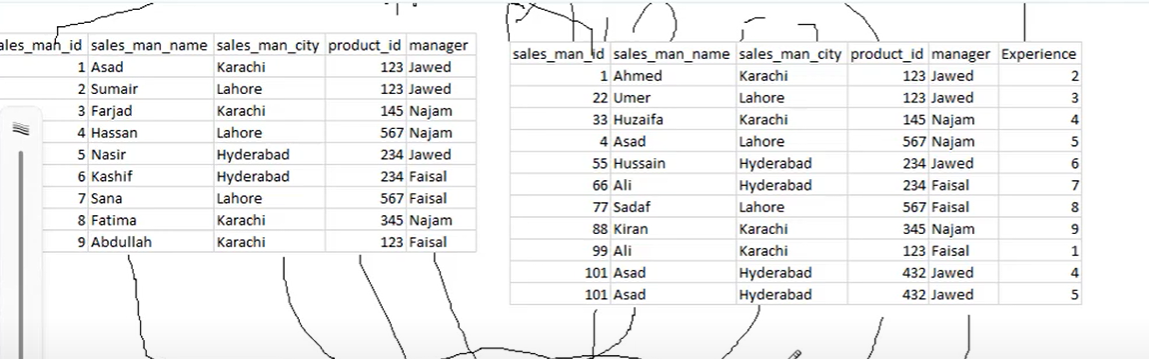

We have no common values in id as first common column

In [50]:
pd.merge(data0 , data1,  how = 'inner')
# merges based on same records in all common column

,sales_man_id,sales_man_name,sales_man_city,product_id,manager,Experience


In [57]:
pd.merge(data0 , data1,  how = 'inner' , on = "sales_man_id")

,sales_man_id,sales_man_name_x,sales_man_city_x,product_id_x,manager_x,sales_man_name_y,sales_man_city_y,product_id_y,manager_y,Experience
0,1,Asad,Karachi,123,Jawed,Ahmed,Karachi,123,Jawed,2
1,4,Hassan,Lahore,567,Najam,Asad,Lahore,567,Najam,5
